Redcard Prediction

In this data challenge we are going to analyze a dataset that comes from a fascinating paper published with commentary in Nature. The core question of the paper is reflected in the title, “Many analysts, one dataset: Making transparent how variations in analytical choices affect results”. The authors recruited around 30 analytic teams who were each tasked with the same research question: “Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?” and given the same data. The dataset came from the players who played in the 2012–13 European football (soccer) professional leagues. Data about the players’ ages, heights, weights, position, skintone rating, and more were included. The results from the teams were then compared to see how the different ways of looking at the dataset yielded different statistical conclusions. Explore the data and try to answer the posed question.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
redcard = pd.read_csv('redcard.csv')

In [4]:
redcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146028 entries, 0 to 146027
Data columns (total 28 columns):
playerShort      146028 non-null object
player           146028 non-null object
club             146028 non-null object
leagueCountry    146028 non-null object
birthday         146028 non-null object
height           145765 non-null float64
weight           143785 non-null float64
position         128302 non-null object
games            146028 non-null int64
victories        146028 non-null int64
ties             146028 non-null int64
defeats          146028 non-null int64
goals            146028 non-null int64
yellowCards      146028 non-null int64
yellowReds       146028 non-null int64
redCards         146028 non-null int64
photoID          124621 non-null object
rater1           124621 non-null float64
rater2           124621 non-null float64
refNum           146028 non-null int64
refCountry       146028 non-null int64
Alpha_3          146027 non-null object
meanIAT        

In [5]:
redcard.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [19]:
str_columns = ['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'position', 'Alpha_3']
X = redcard.drop('redCards', axis=1)
y = redcard['redCards']
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y)

In [59]:
train_all = X_train_all.copy()
train_all['redCards'] = y_train_all

train_clean = train_all.dropna(subset=['rater1', 'rater2'])
X_train = pd.DataFrame()
X_train['rater_avg'] = 0.5 * (train_clean['rater1'] + train_clean['rater2'])
y_train = train_clean['redCards']


In [60]:
print(X_train.shape)
X_train.head()

(93488, 1)


,rater_avg
38047,0.125
51162,0.375
93752,0.250
88306,0.375
109983,0.250


In [61]:
print(y_train.shape)
y_train.head()

(93488,)


38047     0
51162     0
93752     0
88306     0
109983    0
Name: redCards, dtype: int64

In [62]:
mod = sm.OLS(y_train, sm.add_constant(X_train))

res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               redCards   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.066
Date:                Thu, 26 Jul 2018   Prob (F-statistic):             0.0244
Time:                        15:06:59   Log-Likelihood:                 70372.
No. Observations:               93488   AIC:                        -1.407e+05
Df Residuals:                   93486   BIC:                        -1.407e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.001     22.850      0.000       0.011       0.013
rater_avg      0.0029      0.001      2.251      0.024       0.000       0.005
==============================================================================
Omnibus:                   135132.142   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29069249.464
Skew:                           9.065   Prob(JB):                         0.00
Kurtosis:                      87.463   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, without controlling for anything at all, dark skinned players seem more likely to get red cards (0.029 more for change from 0 to 1 rater average, an increase of about 24% over the lightest skinned players who get 0.0119).

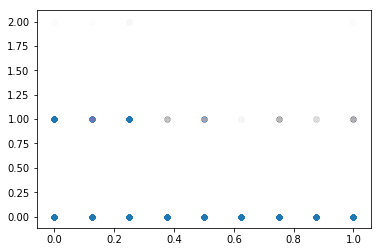

In [76]:
plt.scatter(X_train['rater_avg'], y_train, alpha=0.002)